# Serie de Taylor

Calcula la serie de Taylor de una función y la grafica

In [1]:
# importa las librerias necesarias
import sympy as sy
import numpy as np
import matplotlib.pyplot as plt

# importa algunas funciones
from sympy import sin, cos, ln

In [2]:
# se define la funcion factorial
def factorial(n):
    if n <= 0:
        return 1
    else:
        return n * factorial(n - 1)

In [3]:
# aproximación de Taylor en x0 de la función 'function'
def taylor(function, x0, n, x = sy.Symbol('x')):
    i = 0
    p = 0
    while i <= n:
        p = p + (function.diff(x, i).subs(x, x0))/(factorial(i))*(x - x0)**i
        i += 1
    return p

# define la gráfica
# x0: alrededor de donde se hace la expansión
# n: orden de la expansión
# by: cada cuanto será mostrado

def plot(f, x0 = 0, n = 5, by = 2, x_lims = [-5, 5], y_lims = [-5, 5], npoints = 800, x = sy.Symbol('x')):
    x1 = np.linspace(x_lims[0], x_lims[1], npoints)
    
    for j in range(1, n + 1, by):
        func = taylor(f, x0, j)
        taylor_lambda = sy.lambdify(x, func, "numpy")
        print('expansión de Taylor para n = ' + str(j), ':' , func)
        plt.plot(x1, taylor_lambda(x1), label = 'orden '+ str(j))

    func_lambda = sy.lambdify(x, f, "numpy")
    plt.plot(x1, func_lambda(x1), label = 'f(x)')
    
    plt.xlim(x_lims)
    plt.ylim(y_lims)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.title('Serie de Taylor')
    plt.show()

('expansi\xc3\xb3n de Taylor para n = 1', ':', x)
('expansi\xc3\xb3n de Taylor para n = 3', ':', -x**3/6 + x)
('expansi\xc3\xb3n de Taylor para n = 5', ':', x**5/120 - x**3/6 + x)


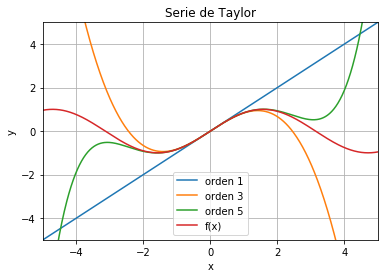

In [4]:
# define la variable, la función a ser aproximada y la grafica
x = sy.Symbol('x')
f = sin(x)
plot(f)

Serie de Taylor simbólico

In [5]:
from sympy import pprint, init_printing, symbols, Function
init_printing()

x, h = symbols("x,h")
f = Function("f")

In [6]:
pprint(f(x).series(x, x0=h, n=7))

                                              ⎛  2        ⎞│                 ⎛
                                            2 ⎜ d         ⎟│               3 ⎜
                                    (-h + x) ⋅⎜────(f(ξ₁))⎟│       (-h + x) ⋅⎜
                                              ⎜   2       ⎟│                 ⎜
                ⎛ d        ⎞│                 ⎝dξ₁        ⎠│ξ₁=h             ⎝
f(h) + (-h + x)⋅⎜───(f(ξ₁))⎟│     + ──────────────────────────── + ───────────
                ⎝dξ₁       ⎠│ξ₁=h                2                            

  3        ⎞│                 ⎛  4        ⎞│                 ⎛  5        ⎞│   
 d         ⎟│               4 ⎜ d         ⎟│               5 ⎜ d         ⎟│   
────(f(ξ₁))⎟│       (-h + x) ⋅⎜────(f(ξ₁))⎟│       (-h + x) ⋅⎜────(f(ξ₁))⎟│   
   3       ⎟│                 ⎜   4       ⎟│                 ⎜   5       ⎟│   
dξ₁        ⎠│ξ₁=h             ⎝dξ₁        ⎠│ξ₁=h             ⎝dξ₁        ⎠│ξ₁=
───────────────── + ──────────────────────────── + 

In [7]:
pprint((sin(x)).series(x, x0=0, n=7))

     3     5        
    x     x     ⎛ 7⎞
x - ── + ─── + O⎝x ⎠
    6    120        
